#  Preprocessing Population Data
The goal of this notebook is to clean and preprocess the regional population data for 2010-2030. Dataset for 2010-2020 were extracted from PSA. Population projections for years 2021-2030 were obtained from Prof Alis' model.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Matplotlib created a temporary config/cache directory at /tmp/matplotlib-h3nelfts because the default path (/home/jjayme/.cache/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


In [2]:
data0 = pd.read_csv('~/cpt5/capstone/data/raw/pop_forecast.csv')
data0

,Unnamed: 0,Unnamed: 1,2021,2022,2023,2024,2025,2026,2027,2028,2029,2030
0,ABRA,BANGUED,51132.0,51868.0,52587.0,53291.0,53983.0,54683.0,55392.0,56111.0,56839.0,57577.0
1,ABRA,BOLINEY,4863.0,5175.0,5486.0,5797.0,6108.0,6420.0,6734.0,7050.0,7368.0,7688.0
2,ABRA,BUCAY,18289.0,18621.0,18947.0,19267.0,19583.0,19901.0,20223.0,20548.0,20876.0,21208.0
3,ABRA,BUCLOC,2391.0,2388.0,2386.0,2385.0,2386.0,2388.0,2392.0,2397.0,2404.0,2412.0
4,ABRA,DAGUIOMAN,2012.0,2006.0,2001.0,1997.0,1994.0,1993.0,1994.0,1996.0,2000.0,2005.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1622,ZAMBOANGA SIBUGAY,ROSELLER LIM,43720.0,43884.0,44063.0,44259.0,44478.0,44734.0,45025.0,45350.0,45712.0,46095.0
1623,ZAMBOANGA SIBUGAY,SIAY,40758.0,40913.0,41054.0,41177.0,41283.0,41394.0,41509.0,41627.0,41750.0,41877.0
1624,ZAMBOANGA SIBUGAY,TALUSAN,27293.0,26742.0,26220.0,25720.0,25248.0,24812.0,24411.0,24042.0,23703.0,23393.0
1625,ZAMBOANGA SIBUGAY,TITAY,54678.0,55333.0,55950.0,56538.0,57102.0,57670.0,58237.0,58804.0,59375.0,59946.0


In [3]:
data0.columns

Index(['Unnamed: 0', 'Unnamed: 1', '2021', '2022', '2023', '2024', '2025',
       '2026', '2027', '2028', '2029', '2030'],
      dtype='object')

In [4]:
data0.columns = ['Province', 'City', '2021', '2022', '2023', '2024', '2025',
       '2026', '2027', '2028', '2029', '2030']

In [5]:
data0[data0['City'] == 'COTABATO CITY']

,Province,City,2021,2022,2023,2024,2025,2026,2027,2028,2029,2030
888,MAGUINDANAO,COTABATO CITY,321624.0,318130.0,314601.0,311037.0,307471.0,304025.0,300686.0,297450.0,294322.0,291306.0


# labeling the regions

In [6]:
NCR = ['METROPOLITAN MANILA', 'Caloocan', 'Malabon', 'Navotas', 'Valenzuela',
       'Quezon City', 'Marikina', 'Pasig', 'Taguig', 'Makati',
       'Manila', 'Mandaluyong', 'San Juan', 'Pasay', 'Parañaque',
       'Las Piñas', 'Muntinlupa', 'Pateros']
CAR = ['Abra', 'Apayao', 'Benguet', 'Ifugao', 'Kalinga', 'Mountain Province']
region_1 = ['Ilocos Norte', 'Ilocos Sur', 'La Union', 'Pangasinan']
region_2 = ['Cagayan Valley', 'Batanes', 'Cagayan', 'Isabela',
            'Nueva Vizcaya', 'Quirino']
region_3 = ['Central Luzon', 'Aurora', 'Bataan', 'Bulacan', 'Nueva Ecija',
            'Pampanga', 'Tarlac', 'Zambales']
region_4a = ['Batangas', 'Cavite', 'Laguna', 'Quezon', 'Rizal']
region_4b = ['Marinduque', 'Occidental Mindoro', 'Oriental Mindoro',
             'Palawan', 'Romblon']
region_5 = ['Albay', 'Camarines Norte', 'Camarines Sur',
            'Catanduanes', 'Masbate', 'Sorsogon']
                      
region_6 = ['Aklan', 'Antique', 'Capiz', 'Guimaras', 'Iloilo',
            'Negros Occidental']
region_7 = ['Bohol', 'Cebu', 'Negros Oriental', 'Siquijor']
region_8 = ['Eastern Visayas', 'Biliran', 'Eastern Samar',
            'Leyte', 'Northern Samar', 'Samar', 'Southern Leyte']

region_9 = ['Zamboanga del Norte', 'Zamboanga del Sur', 'Zamboanga Sibugay']
region_10 = ['Bukidnon', 'Camiguin', 'Lanao del Norte', 
             'Misamis Occidental', 'Misamis Oriental']
region_11 = ['Davao de Oro', 'Davao del Norte', 'Davao del Sur',
             'Davao Occidental', 'Davao Oriental', 'COMPOSTELA VALLEY']
region_12 = ['Cotabato', 'North Cotabato', 'Sarangani', 'South Cotabato', 'Sultan Kudarat']
region_13 = ['Agusan del Norte', 'Agusan del Sur', 'Dinagat Islands',
             'Surigao del Norte', 'Surigao del Sur']
             
barmm = ['Basilan', 'Lanao del Sur', 'Maguindanao', 'Sulu', 'Tawi-Tawi']


In [7]:
regions = [NCR, CAR, region_1, region_2, region_3, region_4a, region_4b,
           region_5, region_6, region_7, region_8, region_9, region_10,
           region_11, region_12, region_13, barmm]

labels = ["NCR", "CAR", "I - Ilocos", "II - Cagayan",
          "III - C. Luzon", "IVA - Calabarzon",
          "MIMAROPA", "V - Bicol", "VI - W. Visayas",
          "VII - C. Visayas", "VIII - E. Visayas", 
          "IX - Zamboanga",
          "X - N. Mindanao", "XI - Davao", "XII - SOCCSKSARGEN",
          "XIII - Caraga", "BARMM"]

In [8]:
data = {}
for region, label in zip(regions, labels):
    temp_list = list()
    for province in region:
        temp_list.append(province.upper())
    data[label]= temp_list

In [9]:
df = pd.DataFrame({"REGION": data.keys(), "Province": data.values()})
df = df.explode("Province")
print(df)

   REGION             Province
0     NCR  METROPOLITAN MANILA
0     NCR             CALOOCAN
0     NCR              MALABON
0     NCR              NAVOTAS
0     NCR           VALENZUELA
..    ...                  ...
16  BARMM              BASILAN
16  BARMM        LANAO DEL SUR
16  BARMM          MAGUINDANAO
16  BARMM                 SULU
16  BARMM            TAWI-TAWI

[104 rows x 2 columns]


In [10]:
df_pop = df.merge(data0, on='Province', how='right')

In [11]:
data0.shape, df_pop.shape

((1627, 12), (1627, 13))

In [12]:
df_pop.head(2)

,REGION,Province,City,2021,2022,2023,2024,2025,2026,2027,2028,2029,2030
0,CAR,ABRA,BANGUED,51132.0,51868.0,52587.0,53291.0,53983.0,54683.0,55392.0,56111.0,56839.0,57577.0
1,CAR,ABRA,BOLINEY,4863.0,5175.0,5486.0,5797.0,6108.0,6420.0,6734.0,7050.0,7368.0,7688.0


In [13]:
# checking if there are duplicates
data0[data0.duplicated(subset=['Province','City'])]

,Province,City,2021,2022,2023,2024,2025,2026,2027,2028,2029,2030


**No duplicates**

In [14]:
cols = ['2021','2022', '2023', '2024', '2025', '2026', '2027',
        '2028', '2029', '2030']

df_new = pd.DataFrame()
for i in cols:
    df2 =df_pop[['REGION', i]]
    df_region = pd.DataFrame(df2.groupby('REGION')[i].sum().astype(int))
    print(df_region.index)
    df_new[i] = df_region

Index(['BARMM', 'CAR', 'I - Ilocos', 'II - Cagayan', 'III - C. Luzon',
       'IVA - Calabarzon', 'IX - Zamboanga', 'MIMAROPA', 'NCR', 'V - Bicol',
       'VI - W. Visayas', 'VII - C. Visayas', 'VIII - E. Visayas',
       'X - N. Mindanao', 'XI - Davao', 'XII - SOCCSKSARGEN', 'XIII - Caraga'],
      dtype='object', name='REGION')
Index(['BARMM', 'CAR', 'I - Ilocos', 'II - Cagayan', 'III - C. Luzon',
       'IVA - Calabarzon', 'IX - Zamboanga', 'MIMAROPA', 'NCR', 'V - Bicol',
       'VI - W. Visayas', 'VII - C. Visayas', 'VIII - E. Visayas',
       'X - N. Mindanao', 'XI - Davao', 'XII - SOCCSKSARGEN', 'XIII - Caraga'],
      dtype='object', name='REGION')
Index(['BARMM', 'CAR', 'I - Ilocos', 'II - Cagayan', 'III - C. Luzon',
       'IVA - Calabarzon', 'IX - Zamboanga', 'MIMAROPA', 'NCR', 'V - Bicol',
       'VI - W. Visayas', 'VII - C. Visayas', 'VIII - E. Visayas',
       'X - N. Mindanao', 'XI - Davao', 'XII - SOCCSKSARGEN', 'XIII - Caraga'],
      dtype='object', name='REGION')
Inde

In [15]:
df_new

,2021,2022,2023,2024,2025,2026,2027,2028,2029,2030
REGION,,,,,,,,,,
BARMM,4936052,5010575,5083327,5154121,5223370,5293197,5363601,5434584,5506197,5578399
CAR,1819164,1840023,1860216,1879713,1898676,1917845,1937210,1956783,1976572,1996562
I - Ilocos,5365538,5428002,5488451,5546804,5603519,5660792,5718624,5777007,5835962,5895507
II - Cagayan,3729141,3771156,3811726,3850804,3888710,3926959,3965560,4004516,4043831,4083515
III - C. Luzon,12559014,12691572,12819703,12943110,13062965,13184570,13307629,13432341,13558763,13686837
IVA - Calabarzon,16400200,16599113,16791312,16976427,17156239,17337222,17519636,17703432,17888618,18075143
IX - Zamboanga,3787969,3829303,3869156,3907493,3944624,3982087,4019883,4058033,4096549,4135428
MIMAROPA,3262679,3295749,3327535,3357990,3387415,3417109,3447096,3477365,3507923,3538763
NCR,13632370,13775223,13913026,14045789,14174317,14304145,14435341,14567786,14701475,14836527


In [16]:
df_pop = pd.read_csv('Population_region_with_interpolation_2010_2025.csv')
df_pop

,Unnamed: 0,year,PHILIPPINES,National Capital Region,Cordillera Administrative Region,Region I - Ilocos,Region II - Cagayan Valley,Region III - Central Luzon,Region IVA - CALABARZON,Region IVB - MIMAROPA,Region V - Bicol,Region VI - Western Visayas,Region VII - Central Visayas,Region VIII - Eastern Visayas,Region IX - Zambonga Peninsula,Region X - Northern Mindanao,Region XI - Davao,Region XII - SOCCSKSARGEN,Caraga,Autonomous Region in Muslim Mindanao
0,0,2010,92337852.0,11855975.0,1616867.0,4748372.0,3229163.0,10137737.0,12609803.0,2744671.0,5420411.0,7102438.0,6800180.0,4101322.0,3407353.0,4297323.0,4468563.0,4109571.0,2429224.0,3256140.0
1,1,2011,94036955.8,12056622.2,1637520.4,4802931.8,3272824.0,10350003.4,12965281.6,2787635.0,5494390.2,7187679.6,6917412.8,4167888.0,3451048.4,4374333.2,4552012.0,4195172.4,2462126.8,3359882.8
2,2,2012,95736059.6,12257269.4,1658173.8,4857491.6,3316485.0,10562269.8,13320760.2,2830599.0,5568369.4,7272921.2,7034645.6,4234454.0,3494743.8,4451343.4,4635461.0,4280773.8,2495029.6,3463625.6
3,3,2013,97435163.4,12457916.6,1678827.2,4912051.4,3360146.0,10774536.2,13676238.8,2873563.0,5642348.6,7358162.8,7151878.4,4301020.0,3538439.2,4528353.6,4718910.0,4366375.2,2527932.4,3567368.4
4,4,2014,99134267.2,12658563.8,1699480.6,4966611.2,3403807.0,10986802.6,14031717.4,2916527.0,5716327.8,7443404.4,7269111.2,4367586.0,3582134.6,4605363.8,4802359.0,4451976.6,2560835.2,3671111.2
5,5,2015,100833371.0,12859211.0,1720134.0,5021171.0,3447468.0,11199069.0,14387196.0,2959491.0,5790307.0,7528646.0,7386344.0,4434152.0,3625830.0,4682374.0,4885808.0,4537578.0,2593738.0,3774854.0
6,6,2016,102530196.0,13066832.0,1739380.0,5076184.0,3493662.0,11437442.0,14741686.0,3006430.0,5865520.0,7610389.0,7511565.0,4495990.0,3660328.0,4755673.0,4967320.0,4621162.0,2627491.0,3853142.0
7,7,2017,104169230.0,13264805.0,1757717.0,5128542.0,3537703.0,11667642.0,15085285.0,3051342.0,5937321.0,7688734.0,7631003.0,4557614.0,3693191.0,4825658.0,5048419.0,4701027.0,2660236.0,3932991.0
8,8,2018,105755180.0,13453701.0,1775210.0,5178410.0,3579715.0,11890314.0,15418944.0,3094357.0,6005949.0,7763898.0,7745017.0,4619183.0,3724550.0,4892512.0,5129342.0,4777419.0,2692072.0,4014587.0
9,9,2019,107288150.0,13633497.0,1791881.0,5225800.0,3619689.0,12105494.0,15742673.0,3135503.0,6071398.0,7835883.0,7853606.0,4680701.0,3754387.0,4956259.0,5210081.0,4850329.0,2723012.0,4097957.0


In [17]:
df_pop.columns

Index(['Unnamed: 0', 'year', 'PHILIPPINES', 'National Capital Region',
       'Cordillera Administrative Region', 'Region I - Ilocos',
       'Region II - Cagayan Valley', 'Region III - Central Luzon',
       'Region IVA - CALABARZON', 'Region IVB - MIMAROPA', 'Region V - Bicol',
       'Region VI - Western Visayas', 'Region VII - Central Visayas',
       'Region VIII - Eastern Visayas', 'Region IX - Zambonga Peninsula',
       'Region X - Northern Mindanao', 'Region XI - Davao',
       'Region XII - SOCCSKSARGEN', 'Caraga',
       'Autonomous Region in Muslim Mindanao'],
      dtype='object')

In [18]:
df_pop.columns = ['index', 'year', 'Philippines',
                 "NCR", "CAR", "I - Ilocos", "II - Cagayan",
                  "III - C. Luzon", "IVA - Calabarzon",
                  "MIMAROPA", "V - Bicol", "VI - W. Visayas",
                  "VII - C. Visayas", "VIII - E. Visayas", 
                  "IX - Zamboanga",
                  "X - N. Mindanao", "XI - Davao", "XII - SOCCSKSARGEN",
                  "XIII - Caraga", "BARMM"]

In [19]:
df_pop.iloc[:11]

,index,year,Philippines,NCR,CAR,I - Ilocos,II - Cagayan,III - C. Luzon,IVA - Calabarzon,MIMAROPA,V - Bicol,VI - W. Visayas,VII - C. Visayas,VIII - E. Visayas,IX - Zamboanga,X - N. Mindanao,XI - Davao,XII - SOCCSKSARGEN,XIII - Caraga,BARMM
0,0,2010,92337852.0,11855975.0,1616867.0,4748372.0,3229163.0,10137737.0,12609803.0,2744671.0,5420411.0,7102438.0,6800180.0,4101322.0,3407353.0,4297323.0,4468563.0,4109571.0,2429224.0,3256140.0
1,1,2011,94036955.8,12056622.2,1637520.4,4802931.8,3272824.0,10350003.4,12965281.6,2787635.0,5494390.2,7187679.6,6917412.8,4167888.0,3451048.4,4374333.2,4552012.0,4195172.4,2462126.8,3359882.8
2,2,2012,95736059.6,12257269.4,1658173.8,4857491.6,3316485.0,10562269.8,13320760.2,2830599.0,5568369.4,7272921.2,7034645.6,4234454.0,3494743.8,4451343.4,4635461.0,4280773.8,2495029.6,3463625.6
3,3,2013,97435163.4,12457916.6,1678827.2,4912051.4,3360146.0,10774536.2,13676238.8,2873563.0,5642348.6,7358162.8,7151878.4,4301020.0,3538439.2,4528353.6,4718910.0,4366375.2,2527932.4,3567368.4
4,4,2014,99134267.2,12658563.8,1699480.6,4966611.2,3403807.0,10986802.6,14031717.4,2916527.0,5716327.8,7443404.4,7269111.2,4367586.0,3582134.6,4605363.8,4802359.0,4451976.6,2560835.2,3671111.2
5,5,2015,100833371.0,12859211.0,1720134.0,5021171.0,3447468.0,11199069.0,14387196.0,2959491.0,5790307.0,7528646.0,7386344.0,4434152.0,3625830.0,4682374.0,4885808.0,4537578.0,2593738.0,3774854.0
6,6,2016,102530196.0,13066832.0,1739380.0,5076184.0,3493662.0,11437442.0,14741686.0,3006430.0,5865520.0,7610389.0,7511565.0,4495990.0,3660328.0,4755673.0,4967320.0,4621162.0,2627491.0,3853142.0
7,7,2017,104169230.0,13264805.0,1757717.0,5128542.0,3537703.0,11667642.0,15085285.0,3051342.0,5937321.0,7688734.0,7631003.0,4557614.0,3693191.0,4825658.0,5048419.0,4701027.0,2660236.0,3932991.0
8,8,2018,105755180.0,13453701.0,1775210.0,5178410.0,3579715.0,11890314.0,15418944.0,3094357.0,6005949.0,7763898.0,7745017.0,4619183.0,3724550.0,4892512.0,5129342.0,4777419.0,2692072.0,4014587.0
9,9,2019,107288150.0,13633497.0,1791881.0,5225800.0,3619689.0,12105494.0,15742673.0,3135503.0,6071398.0,7835883.0,7853606.0,4680701.0,3754387.0,4956259.0,5210081.0,4850329.0,2723012.0,4097957.0


In [20]:
df_pop.iloc[:11, 1:]

,year,Philippines,NCR,CAR,I - Ilocos,II - Cagayan,III - C. Luzon,IVA - Calabarzon,MIMAROPA,V - Bicol,VI - W. Visayas,VII - C. Visayas,VIII - E. Visayas,IX - Zamboanga,X - N. Mindanao,XI - Davao,XII - SOCCSKSARGEN,XIII - Caraga,BARMM
0,2010,92337852.0,11855975.0,1616867.0,4748372.0,3229163.0,10137737.0,12609803.0,2744671.0,5420411.0,7102438.0,6800180.0,4101322.0,3407353.0,4297323.0,4468563.0,4109571.0,2429224.0,3256140.0
1,2011,94036955.8,12056622.2,1637520.4,4802931.8,3272824.0,10350003.4,12965281.6,2787635.0,5494390.2,7187679.6,6917412.8,4167888.0,3451048.4,4374333.2,4552012.0,4195172.4,2462126.8,3359882.8
2,2012,95736059.6,12257269.4,1658173.8,4857491.6,3316485.0,10562269.8,13320760.2,2830599.0,5568369.4,7272921.2,7034645.6,4234454.0,3494743.8,4451343.4,4635461.0,4280773.8,2495029.6,3463625.6
3,2013,97435163.4,12457916.6,1678827.2,4912051.4,3360146.0,10774536.2,13676238.8,2873563.0,5642348.6,7358162.8,7151878.4,4301020.0,3538439.2,4528353.6,4718910.0,4366375.2,2527932.4,3567368.4
4,2014,99134267.2,12658563.8,1699480.6,4966611.2,3403807.0,10986802.6,14031717.4,2916527.0,5716327.8,7443404.4,7269111.2,4367586.0,3582134.6,4605363.8,4802359.0,4451976.6,2560835.2,3671111.2
5,2015,100833371.0,12859211.0,1720134.0,5021171.0,3447468.0,11199069.0,14387196.0,2959491.0,5790307.0,7528646.0,7386344.0,4434152.0,3625830.0,4682374.0,4885808.0,4537578.0,2593738.0,3774854.0
6,2016,102530196.0,13066832.0,1739380.0,5076184.0,3493662.0,11437442.0,14741686.0,3006430.0,5865520.0,7610389.0,7511565.0,4495990.0,3660328.0,4755673.0,4967320.0,4621162.0,2627491.0,3853142.0
7,2017,104169230.0,13264805.0,1757717.0,5128542.0,3537703.0,11667642.0,15085285.0,3051342.0,5937321.0,7688734.0,7631003.0,4557614.0,3693191.0,4825658.0,5048419.0,4701027.0,2660236.0,3932991.0
8,2018,105755180.0,13453701.0,1775210.0,5178410.0,3579715.0,11890314.0,15418944.0,3094357.0,6005949.0,7763898.0,7745017.0,4619183.0,3724550.0,4892512.0,5129342.0,4777419.0,2692072.0,4014587.0
9,2019,107288150.0,13633497.0,1791881.0,5225800.0,3619689.0,12105494.0,15742673.0,3135503.0,6071398.0,7835883.0,7853606.0,4680701.0,3754387.0,4956259.0,5210081.0,4850329.0,2723012.0,4097957.0


In [21]:
df_2030 = df_new.T
df_2030['Philippines'] = df_new.T.sum(axis=1)
df_2030.reset_index(inplace=True)

In [22]:
df_2030.rename(columns={'index': 'year'}, inplace=True)

In [23]:
df_2030.columns

Index(['year', 'BARMM', 'CAR', 'I - Ilocos', 'II - Cagayan', 'III - C. Luzon',
       'IVA - Calabarzon', 'IX - Zamboanga', 'MIMAROPA', 'NCR', 'V - Bicol',
       'VI - W. Visayas', 'VII - C. Visayas', 'VIII - E. Visayas',
       'X - N. Mindanao', 'XI - Davao', 'XII - SOCCSKSARGEN', 'XIII - Caraga',
       'Philippines'],
      dtype='object', name='REGION')

In [24]:
df_2030

REGION,year,BARMM,CAR,I - Ilocos,II - Cagayan,III - C. Luzon,IVA - Calabarzon,IX - Zamboanga,MIMAROPA,NCR,V - Bicol,VI - W. Visayas,VII - C. Visayas,VIII - E. Visayas,X - N. Mindanao,XI - Davao,XII - SOCCSKSARGEN,XIII - Caraga,Philippines
0,2021,4936052,1819164,5365538,3729141,12559014,16400200,3787969,3262679,13632370,6153823,8048599,8176384,4602369,5082746,5300310,4616760,2835647,110308765
1,2022,5010575,1840023,5428002,3771156,12691572,16599113,3829303,3295749,13775223,6223244,8139555,8267792,4655935,5140965,5355267,4655271,2865446,111544191
2,2023,5083327,1860216,5488451,3811726,12819703,16791312,3869156,3327535,13913026,6290306,8227461,8356089,4707797,5197325,5408163,4691959,2894155,112737707
3,2024,5154121,1879713,5546804,3850804,12943110,16976427,3907493,3357990,14045789,6354938,8312193,8441179,4757863,5251727,5458954,4726825,2921727,113887657
4,2025,5223370,1898676,5603519,3888710,13062965,17156239,3944624,3387415,14174317,6417675,8394478,8523735,4806559,5304631,5508063,4760360,2948422,115003758
5,2026,5293197,1917845,5660792,3926959,13184570,17337222,3982087,3417109,14304145,6481007,8477587,8607104,4855716,5358101,5557626,4794341,2975365,116130773
6,2027,5363601,1937210,5718624,3965560,13307629,17519636,4019883,3447096,14435341,6544953,8561515,8691303,4905388,5412127,5607740,4828677,3002596,117268879
7,2028,5434584,1956783,5777007,4004516,13432341,17703432,4058033,3477365,14567786,6609521,8646251,8776312,4955550,5466726,5658354,4863431,3030102,118418094
8,2029,5506197,1976572,5835962,4043831,13558763,17888618,4096549,3507923,14701475,6674695,8731821,8862173,5006210,5521879,5709410,4898618,3057890,119578586
9,2030,5578399,1996562,5895507,4083515,13686837,18075143,4135428,3538763,14836527,6740513,8818237,8948876,5057392,5577604,5760974,4934234,3085948,120750459


In [25]:
cols = df_pop.columns[1:]
cols

Index(['year', 'Philippines', 'NCR', 'CAR', 'I - Ilocos', 'II - Cagayan',
       'III - C. Luzon', 'IVA - Calabarzon', 'MIMAROPA', 'V - Bicol',
       'VI - W. Visayas', 'VII - C. Visayas', 'VIII - E. Visayas',
       'IX - Zamboanga', 'X - N. Mindanao', 'XI - Davao', 'XII - SOCCSKSARGEN',
       'XIII - Caraga', 'BARMM'],
      dtype='object')

In [26]:
df_2030 = df_2030.loc[:, cols]

In [27]:
df_pop.drop(columns='index', inplace=True)

In [28]:
df_all = pd.concat([df_pop.iloc[:11], df_2030])

In [29]:
df_all.reset_index()

,index,year,Philippines,NCR,CAR,I - Ilocos,II - Cagayan,III - C. Luzon,IVA - Calabarzon,MIMAROPA,V - Bicol,VI - W. Visayas,VII - C. Visayas,VIII - E. Visayas,IX - Zamboanga,X - N. Mindanao,XI - Davao,XII - SOCCSKSARGEN,XIII - Caraga,BARMM
0,0,2010,92337852.0,11855975.0,1616867.0,4748372.0,3229163.0,10137737.0,12609803.0,2744671.0,5420411.0,7102438.0,6800180.0,4101322.0,3407353.0,4297323.0,4468563.0,4109571.0,2429224.0,3256140.0
1,1,2011,94036955.8,12056622.2,1637520.4,4802931.8,3272824.0,10350003.4,12965281.6,2787635.0,5494390.2,7187679.6,6917412.8,4167888.0,3451048.4,4374333.2,4552012.0,4195172.4,2462126.8,3359882.8
2,2,2012,95736059.6,12257269.4,1658173.8,4857491.6,3316485.0,10562269.8,13320760.2,2830599.0,5568369.4,7272921.2,7034645.6,4234454.0,3494743.8,4451343.4,4635461.0,4280773.8,2495029.6,3463625.6
3,3,2013,97435163.4,12457916.6,1678827.2,4912051.4,3360146.0,10774536.2,13676238.8,2873563.0,5642348.6,7358162.8,7151878.4,4301020.0,3538439.2,4528353.6,4718910.0,4366375.2,2527932.4,3567368.4
4,4,2014,99134267.2,12658563.8,1699480.6,4966611.2,3403807.0,10986802.6,14031717.4,2916527.0,5716327.8,7443404.4,7269111.2,4367586.0,3582134.6,4605363.8,4802359.0,4451976.6,2560835.2,3671111.2
5,5,2015,100833371.0,12859211.0,1720134.0,5021171.0,3447468.0,11199069.0,14387196.0,2959491.0,5790307.0,7528646.0,7386344.0,4434152.0,3625830.0,4682374.0,4885808.0,4537578.0,2593738.0,3774854.0
6,6,2016,102530196.0,13066832.0,1739380.0,5076184.0,3493662.0,11437442.0,14741686.0,3006430.0,5865520.0,7610389.0,7511565.0,4495990.0,3660328.0,4755673.0,4967320.0,4621162.0,2627491.0,3853142.0
7,7,2017,104169230.0,13264805.0,1757717.0,5128542.0,3537703.0,11667642.0,15085285.0,3051342.0,5937321.0,7688734.0,7631003.0,4557614.0,3693191.0,4825658.0,5048419.0,4701027.0,2660236.0,3932991.0
8,8,2018,105755180.0,13453701.0,1775210.0,5178410.0,3579715.0,11890314.0,15418944.0,3094357.0,6005949.0,7763898.0,7745017.0,4619183.0,3724550.0,4892512.0,5129342.0,4777419.0,2692072.0,4014587.0
9,9,2019,107288150.0,13633497.0,1791881.0,5225800.0,3619689.0,12105494.0,15742673.0,3135503.0,6071398.0,7835883.0,7853606.0,4680701.0,3754387.0,4956259.0,5210081.0,4850329.0,2723012.0,4097957.0


In [30]:
regions = df_all.columns[2:]

In [31]:
plt.figure(figsize=(10,5))
for i in regions:
    print(df_all[i]/1_000_000)
#     plt.plot(df_all.year, df_all[i],
#              '+-', label=i)

0     11.855975
1     12.056622
2     12.257269
3     12.457917
4     12.658564
5     12.859211
6     13.066832
7     13.264805
8     13.453701
9     13.633497
10    13.804656
0     13.632370
1     13.775223
2     13.913026
3     14.045789
4     14.174317
5     14.304145
6     14.435341
7     14.567786
8     14.701475
9     14.836527
Name: NCR, dtype: float64
0     1.616867
1     1.637520
2     1.658174
3     1.678827
4     1.699481
5     1.720134
6     1.739380
7     1.757717
8     1.775210
9     1.791881
10    1.807738
0     1.819164
1     1.840023
2     1.860216
3     1.879713
4     1.898676
5     1.917845
6     1.937210
7     1.956783
8     1.976572
9     1.996562
Name: CAR, dtype: float64
0     4.748372
1     4.802932
2     4.857492
3     4.912051
4     4.966611
5     5.021171
6     5.076184
7     5.128542
8     5.178410
9     5.225800
10    5.270807
0     5.365538
1     5.428002
2     5.488451
3     5.546804
4     5.603519
5     5.660792
6     5.718624
7     5.777007
8     5.8359

<Figure size 720x360 with 0 Axes>

In [32]:
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple',
         'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan',
         'darkmagenta', 'orangered', 'lime', 'darkolivegreen', 'cadetblue',
         'darkgoldenrod', 'fuchsia']

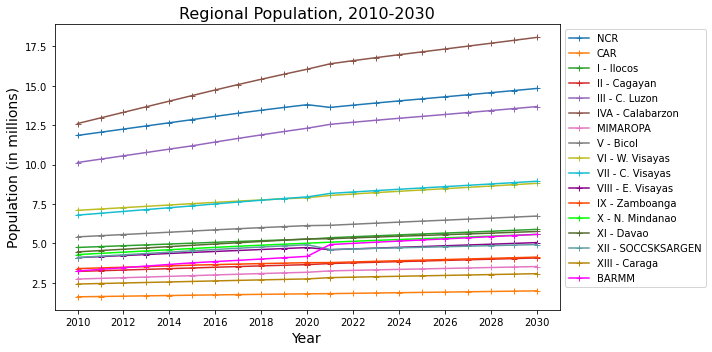

In [33]:
plt.figure(figsize=(10,5))
for i,j in enumerate(regions):
    plt.plot(df_all.year, df_all[j]/1_000_000,
             '-+', label=j, color=colors[i], )
plt.legend(bbox_to_anchor=[1,1])
plt.xticks(np.arange(2010, 2031, 2))
plt.title('Regional Population, 2010-2030', fontsize=16)
plt.ylabel('Population (in millions)', fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.tight_layout()
plt.savefig('regional_population.png', dpi=300);

*Since 2020, Cotabato City belongs to BARMM (formerly from XII). This is why we see a spike in 2021 for BARMM and a downward trend for region XII.**

In [34]:
df_all.to_csv('~/cpt5/capstone/data/processed/'
              'regional_projection_2010_2030.csv')

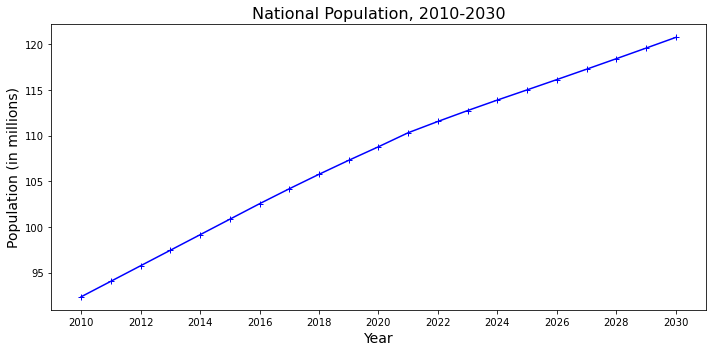

In [35]:
plt.figure(figsize=(10,5))
plt.plot(df_all.year, df_all['Philippines']/1_000_000, 
         '+-', color='blue')
#plt.legend(bbox_to_anchor=[1,1])
# plt.legend(loc="lower right")
plt.xticks(np.arange(2010, 2031, 2))
plt.title('National Population, 2010-2030', fontsize=16)
plt.ylabel('Population (in millions)', fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.tight_layout()
plt.savefig('Philippines_Population.png', dpi=300);

In [34]:
df_all[df_all['year']=='2030'].T.iloc[2:,
                    :].reset_index().sort_values(by=9, ascending=True)

,index,9
1,CAR,1996562.0
15,XIII - Caraga,3085948.0
6,MIMAROPA,3538763.0
3,II - Cagayan,4083515.0
11,IX - Zamboanga,4135428.0
14,XII - SOCCSKSARGEN,4934234.0
10,VIII - E. Visayas,5057392.0
12,X - N. Mindanao,5577604.0
16,ARMM / BARMM,5578399.0
13,XI - Davao,5760974.0
